Now for parcellations.  How do they work.  Begin with 2d map metaphor

In [1]:
import nibabel as nib
atlasPath='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-parcellation-volume.id-5c50c3f7ecd2f200ccfe9fae/parc.nii.gz'
atlasImg = nib.load(atlasPath)

import nibabel as nib
img = nib.load('/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-anat-t1w.tag-acpc_aligned.tag-brain_extracted.id-5c57072befbc2800526291bb/t1.nii.gz')

In [2]:
atlasHeader = img.header
print(atlasHeader)  

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 145 174 145   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.25  1.25  1.25  1.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.11'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 1.0
quatern_d       : 0.0
qoffset_x       : 90.0
qoffset_y       : -126.0
qoffset_z       : -72.0
srow_x          : [-1.25 

In [3]:
atlasDataDimensions=atlasImg.shape
print('Data dimensions')
print('(How many data entries in each dimension)')
print(atlasDataDimensions)

Data dimensions
(How many data entries in each dimension)
(182, 217, 182)


In [4]:
print('Voxel dimensions (in mm)' )
print(atlasImg.header.get_zooms())
voxelDims=atlasImg.header.get_zooms()


Voxel dimensions (in mm)
(1.0, 1.0, 1.0)


In [5]:
print('How much space does this representation correspond to?')
print('')
print(f'{atlasDataDimensions[0]*voxelDims[0]} mm by {atlasDataDimensions[1]*voxelDims[1]} mm by {atlasDataDimensions[2]*voxelDims[2]} mm' )

How much space does this representation correspond to?

182.0 mm by 217.0 mm by 182.0 mm


In [6]:
import numpy as np
atlasData = atlasImg.get_fdata()
print('Number of unique labels in this atlas')
print('')
print(np.unique(atlasData))

Number of unique labels in this atlas

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 19

Total number of voxels
7187908

Minimum voxel value
0.0

Maximum voxel value
376.0

Number of voxel values less than or equal to zero
6517981

Number of voxel values greater than zero
669927



TypeError: `bins` must be an integer, a string, or an array

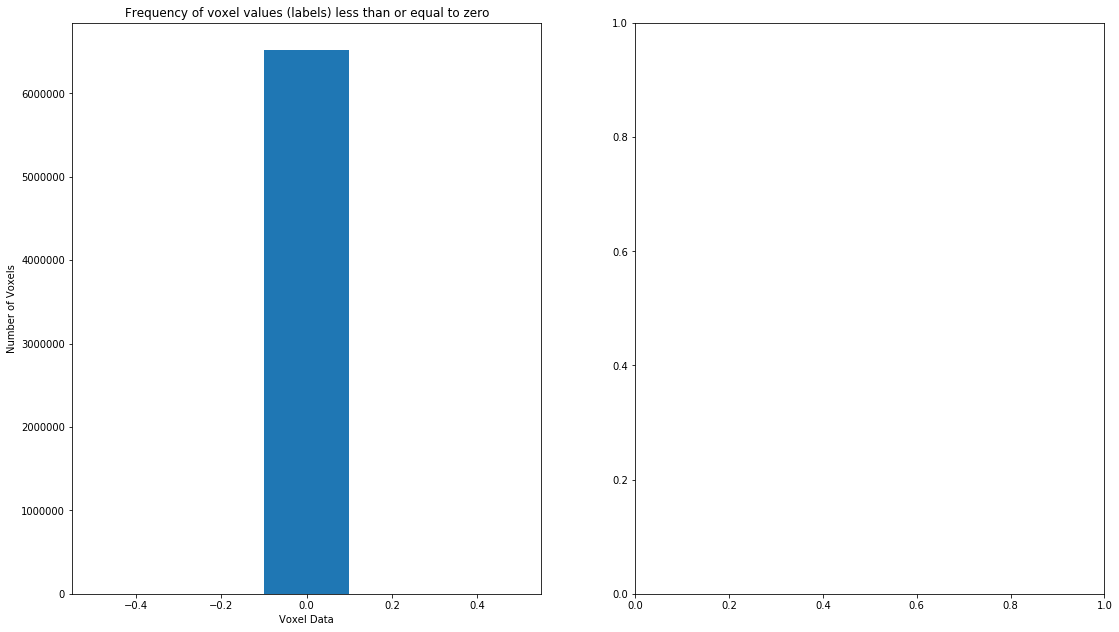

In [7]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
unwrappedData=np.ndarray.flatten(atlasData)


print('Total number of voxels')
voxTotal=atlasDataDimensions[0]*atlasDataDimensions[1]*atlasDataDimensions[2]
print(voxTotal)
print('')

print('Minimum voxel value')
print(np.min(unwrappedData))
print('')

print('Maximum voxel value')
print(np.max(unwrappedData))
print('')

splitPoint=0

def smallVal(n): 
    return n<=splitPoint
def largeVal(n):
    return n>splitPoint

result=map(smallVal,unwrappedData)
smallBool=list(result)

result=map(largeVal,unwrappedData)
largeBool=list(result)

print('Number of voxel values less than or equal to zero')
print(sum(smallBool))
print('')

print('Number of voxel values greater than zero')
print(sum(largeBool))
print('')

plt.subplot(1, 2, 1)
plt.hist(unwrappedData[smallBool], bins=5)
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Frequency of voxel values (labels) less than or equal to zero')
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.subplot(1, 2, 2)
plt.hist(unwrappedData[largeBool], np.max(unwrappedData))
plt.xlabel('Voxel Data')
plt.ylabel('Number of Voxels')
plt.title('Frequency of voxel values (labels) greater than zero')

In [ ]:

atlasPath='/Users/plab/Documents/JupyerData/proj-5c50b6f12daf2e0032f880eb/sub-100206/dt-neuro-parcellation-volume.id-5c50c3f7ecd2f200ccfe9fae/parc.nii.gz'

atlas_widget = NiftiWidget(atlasPath)
atlas_widget.nifti_plotter()

[Discuss how this works]

As you explore the parcellation there are a number of things to take note of.  First and foremost we can note the means by which the parcellation actually parcellates the brain.  Note that the parcellation is, in essence, a volumetric mask which contains integer values corresponding to labels stored in a lookup table.  Each voxel is identified as corresponding to some component of an anatomical entity.  The anatomical entities that manifest in a parcellation vary depending on what standard is used, but typically they correspond to For example [PROVIDE EXAMPLE HERE].  




In [ ]:
print('T1 voxel resolution (in mm)')
print(atlasImg.header.get_zooms())
print('')


print('T1 voxel affine')
atlasImgAff=atlasImg.affine
print(atlasImg.affine)
print('')

print('Coordinates of posterior commisure')
imgSpatialTrans=np.abs([atlasImgAff[0,3]/atlasImgAff[0,0],imgAff[1,3]/atlasImgAff[1,1],atlasImgAff[2,3]/atlasImgAff[2,2]])
print(imgSpatialTrans)
print('')



[Introduct Anatomical T1 ]

In [ ]:
voxelDims

    Furthermore, because parcellations are performed on a specific subject's anatomy, the overlaying of one subject's parcellation on another subjects brain will result in an uninformative and innacruate characterization of the subject's brain.
    
DISPLAY MISMATCH HERE

    Next, we look at the tractogram in order to get a better sense of white matter's relation to tractography using the preceeding discussion as a basis for comparison.